In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import tensorflow as tf
import sonnet as snt
import numpy as np
from bnn.model_utils import *
import matplotlib.pyplot as plt
from cycler import cycler
from bnn.BNN_MLP import *
from bnn.utils import *
from copy import deepcopy
from tensorflow.examples.tutorials.mnist import input_data
from bnn.train_utils import *


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.



Using TensorFlow backend.


In [3]:
output_dim = 10
#task_labels = [[0,1], [2,3], [4,5], [6,7], [8,9]]
task_labels = [[0,1,2,3,4], [5,6,7,8,9]]


In [4]:
net = BNN_MLP(n_inputs=784, n_outputs=10, hidden_units=[100,100], init_mu=0.0, init_rho=-3.0, 
              activation=tf.nn.relu, last_activation=tf.nn.softmax,num_task=2)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.distributions`.
Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.distributions`.


In [5]:
train_task = construct_split_mnist(task_labels)
test_task = construct_split_mnist(task_labels,split='test')
train_init,test_init = load_iterator(net,train_task,test_task)

Initialization ... 
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

Instructions for updating:
Use tf.cast instead.


In [6]:
sess = tf.InteractiveSession()
sess.run( tf.global_variables_initializer() )

In [7]:
num_epochs = 5

# Conventional Bayesian Neural Network

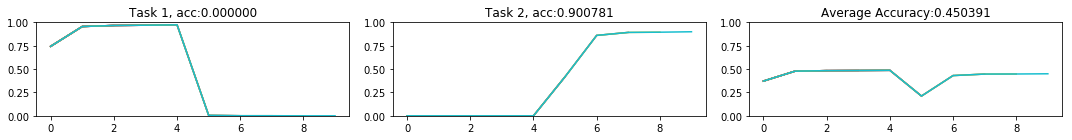

In [8]:
common_train(net,sess,num_epochs,20,train_task,test_task,train_init,test_init,lams=[0.01])

# Bayesian Sequential Inference (Proposed)(To be checked)

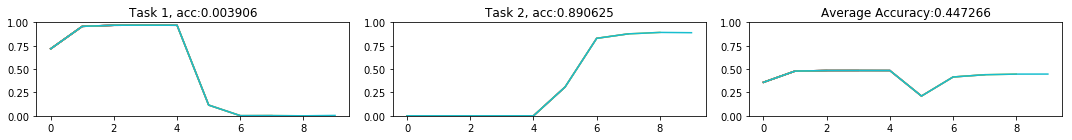

In [9]:
common_train(net,sess,num_epochs,20,train_task,test_task,train_init,test_init,lams=[0.01],sequential=True)

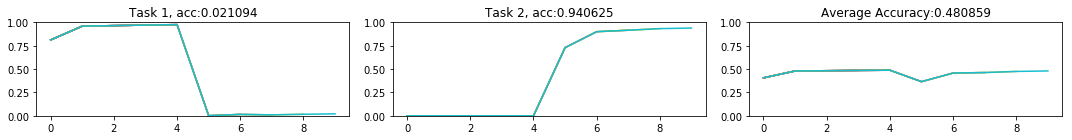

In [10]:
common_train(net,sess,num_epochs,20,train_task,test_task,train_init,test_init,lams=[0.001],sequential=True)

# Incremental Moment Matching (IMM)

## 1. Mean-IMM

### (a) bayesian updating

imm_mean best alpha is:0.42105263157894735, best accuracy is 0.509375


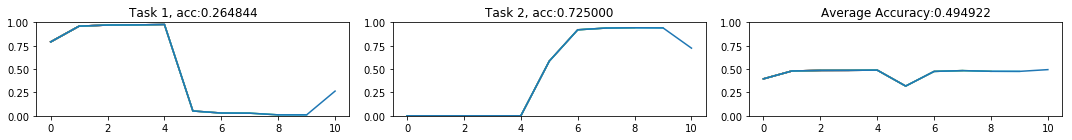

In [11]:
imm_train(net,sess,num_epochs,20,train_task,test_task,train_init,test_init,lams=[0.0001],sequential=True,imm=True)

In [12]:
print(net.params_mean[0][0][0][0],net.params_mean[1][0][0][0],sess.run(net.tensor_mean[0][0][0]))

0.009073231 0.00053552055 0.005478406


In [14]:
#1-0.47368421052631576 0.009921589105263

imm_mean best alpha is:0.6842105263157894, best accuracy is 0.58671875


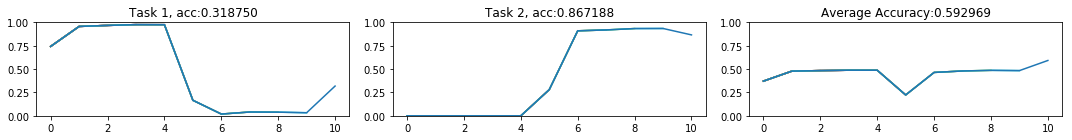

In [15]:
imm_train(net,sess,num_epochs,20,train_task,test_task,train_init,test_init,lams=[0.001],sequential=True,imm=True)

### (b) no bayesian updating

imm_mean best alpha is:0.5789473684210527, best accuracy is 0.625


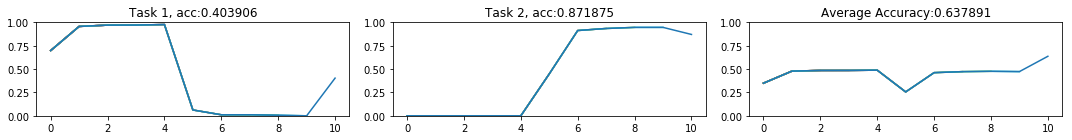

In [16]:
imm_train(net,sess,num_epochs,20,train_task,test_task,train_init,test_init,lams=[0.0001],imm=True)

imm_mean best alpha is:0.8421052631578947, best accuracy is 0.46445312499999997


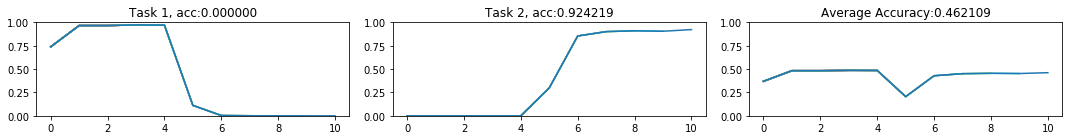

In [17]:
imm_train(net,sess,num_epochs,20,train_task,test_task,train_init,test_init,lams=[0.01],imm=True)

## 2. Mode - IMM

### (a) bayesian updating

imm_mode best alpha is:0.21052631578947367, best accuracy is 0.55546875


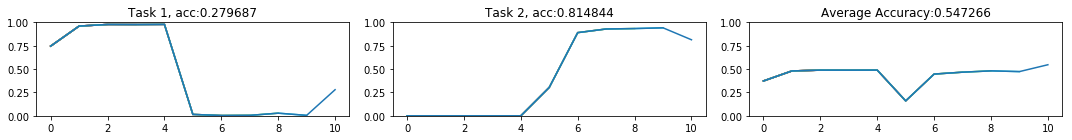

In [18]:
imm_train(net,sess,num_epochs,20,train_task,test_task,train_init,test_init,lams=[0.0001],sequential=True,imm_mode=True)

imm_mode best alpha is:0.21052631578947367, best accuracy is 0.528515625


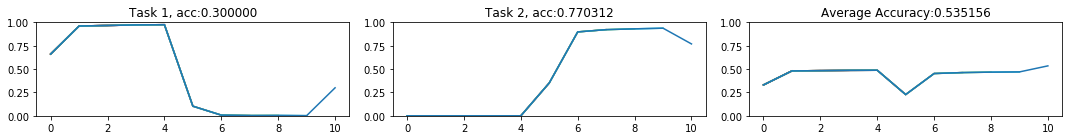

In [19]:
imm_train(net,sess,num_epochs,20,train_task,test_task,train_init,test_init,lams=[0.001],sequential=True,imm_mode=True)

### (b) no bayesian updating

imm_mode best alpha is:0.5789473684210527, best accuracy is 0.5359375


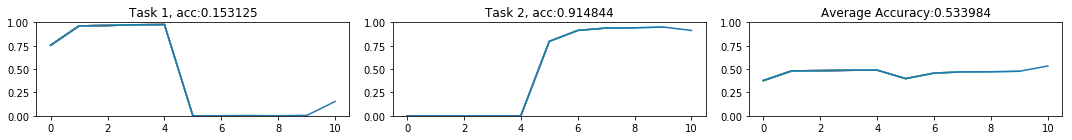

In [29]:
imm_train(net,sess,num_epochs,20,train_task,test_task,train_init,test_init,lams=[0.0001],imm_mode=True)

imm_mode best alpha is:1.0, best accuracy is 0.473828125


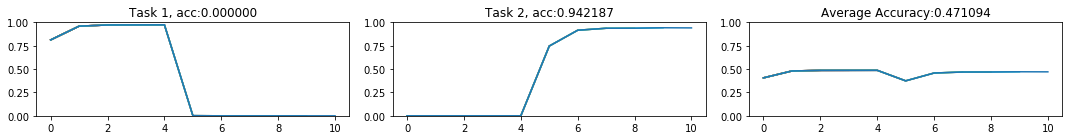

In [30]:
imm_train(net,sess,num_epochs,20,train_task,test_task,train_init,test_init,lams=[0.001],imm_mode=True)

# Bayesian IMM (proposed)

## 1. mean_bayes_imm

### (a) bayesian updating

bayes_imm_mean best alpha is:0.3684210526315789, best accuracy is 0.568359375


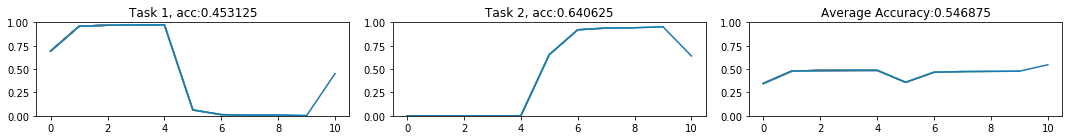

In [31]:
bayes_imm_train(net,sess,num_epochs,20,train_task,test_task,train_init,test_init,lams=[0.0001],sequential=True,imm=True)

bayes_imm_mean best alpha is:0.7368421052631579, best accuracy is 0.498046875


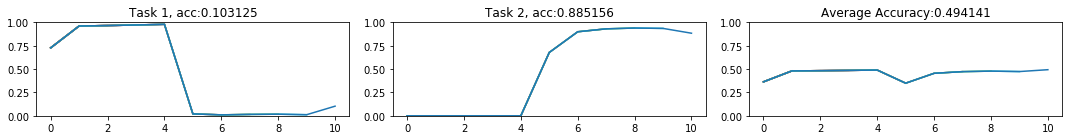

In [32]:
bayes_imm_train(net,sess,num_epochs,20,train_task,test_task,train_init,
                test_init,lams=[0.001],sequential=True,imm=True)

### (b) no bayesian updating

bayes_imm_mean best alpha is:0.5263157894736842, best accuracy is 0.63359375


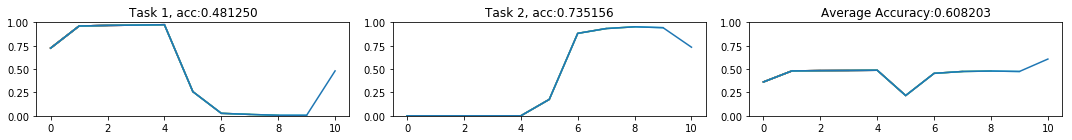

In [33]:
bayes_imm_train(net,sess,num_epochs,20,train_task,test_task,train_init,test_init,lams=[0.0001],imm=True)

bayes_imm_mean best alpha is:0.7368421052631579, best accuracy is 0.475390625


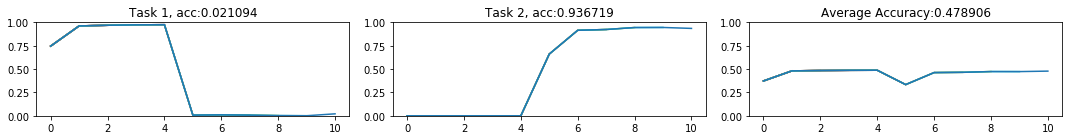

In [34]:
bayes_imm_train(net,sess,num_epochs,20,train_task,test_task,train_init,test_init,lams=[0.001],imm=True)

## 2. mean_bayes_imm_kl

### (a) bayesian updating

bayes_imm_mean_kl best alpha is:0.5789473684210527, best accuracy is 0.63984375


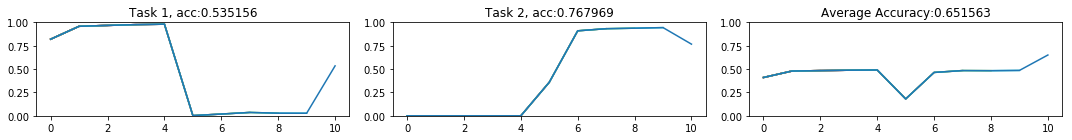

In [38]:
bayes_imm_kl_train(net,sess,num_epochs,20,train_task,test_task,train_init,test_init,lams=[0.0001],
                   sequential=True,imm=True)

bayes_imm_mean_kl best alpha is:0.05263157894736842, best accuracy is 0.5265625


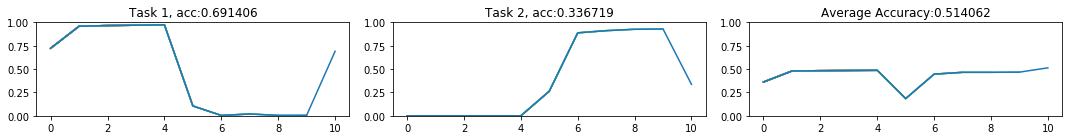

In [39]:
bayes_imm_kl_train(net,sess,num_epochs,20,train_task,test_task,train_init,test_init,lams=[0.001],
                   sequential=True,imm=True)

### (b) no bayesian updating

bayes_imm_mean_kl best alpha is:0.6842105263157894, best accuracy is 0.479296875


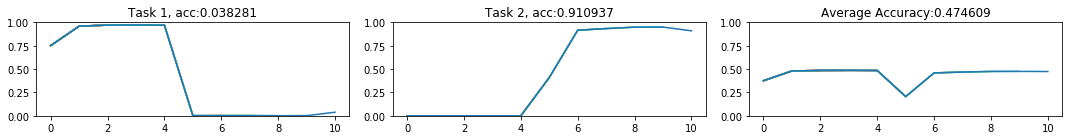

In [40]:
bayes_imm_kl_train(net,sess,num_epochs,20,train_task,test_task,train_init,test_init,lams=[0.0001],
                   imm=True)

bayes_imm_mean_kl best alpha is:0.5263157894736842, best accuracy is 0.52421875


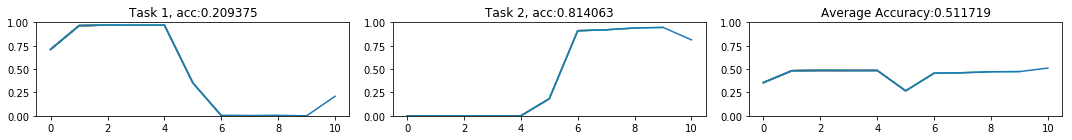

In [41]:
bayes_imm_kl_train(net,sess,num_epochs,20,train_task,test_task,train_init,test_init,lams=[0.001],
                   imm=True)

## 3. mode_bayes_IMM

Computing Fisher ...


KeyboardInterrupt: 

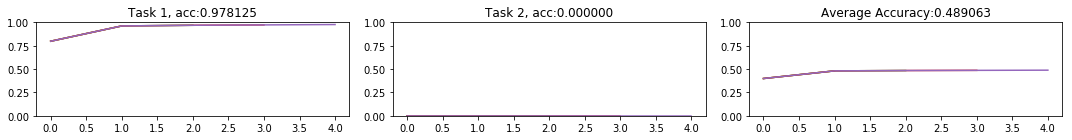

In [43]:
bayes_imm_train(net,sess,num_epochs,20,train_task,test_task,train_init,test_init,
                lams=[0.0001],sequential=True,imm_mode=True)

In [ ]:
bayes_imm_train(net,sess,num_epochs,20,train_task,test_task,train_init,test_init,lams=[0.001],sequential=True,
                imm_mode=True)

## 4. mode_bayes_IMM

In [ ]:
bayes_imm_train_kl(net,sess,num_epochs,20,train_task,test_task,train_init,test_init,lams=[0.0001],sequential=True
                   ,imm_mode=True)

In [ ]:
bayes_imm_train_kl(net,sess,num_epochs,20,train_task,test_task,train_init,test_init,lams=[0.001],sequential=True,
                   imm_mode=True)

# Blur-EM

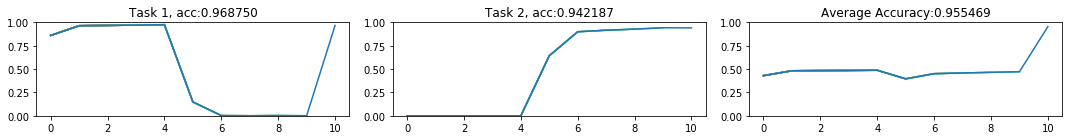

In [46]:
em_train(net,sess,num_epochs,20,train_task,test_task,train_init,test_init,lams=[0.001],
              sequential=False)

In [ ]:
test_task[0][0].shape[0] + test_task[1][0].shape[0]

In [28]:
test_accs = {}
param_idx = em_eval(net,sess,2,None,test_task,test_accs,record=False,disp=False)
eval(net,sess,2,None,test_init,test_accs,params_idx=param_idx,record=False,disp=False)

0.96015625

In [20]:
test_accs = {}
em_eval(net,sess,2,None,test_task,test_accs,disp=False,record=False)

[0.0005182  0.00670712]
[0.096875, 0.0]
0.096875
[0.00523278 0.00120077]
[0.0, 0.096875]
0.096875


0.0096875

In [47]:
a = net.params_mean[0] 
b = net.params_mean[1]
num = 0
for idx in range(len(a)):
    num += np.sum(a[idx]==b[idx])
print(num)


57269


In [ ]:
print(net.num_merged_params, net.num_merged_params  / 42310 /2)


In [ ]:
em_train(net,sess,num_epochs,20,train_task,test_task,train_init,test_init,lams=[0.0001],
              sequential=True)

In [ ]:
a = net.params_mean[0] 
b = net.params_mean[1]
num = 0
for idx in range(len(a)):
    num += np.sum(a[idx]==b[idx])
print(num)


In [ ]:
print(net.num_merged_params, net.num_merged_params  / 42310 /2)


In [ ]:
em_train(net,sess,num_epochs,20,train_task,test_task,train_init,test_init,lams=[0.001],
         num_component=5,num_thresh_hold=0.2,sequential=False)

In [ ]:
em_train(net,sess,num_epochs,20,train_task,test_task,train_init,test_init,lams=[0.001],
         num_component=4,num_thresh_hold=0.25,sequential=True)

In [ ]:
em_train(net,sess,num_epochs,20,train_task,test_task,train_init,test_init,lams=[0.001],
         num_component=3,num_thresh_hold=0.33,sequential=True)

In [ ]:
em_train(net,sess,num_epochs,20,train_task,test_task,train_init,test_init,lams=[0.001],
         num_component=2,num_thresh_hold=0.4,sequential=True)

In [ ]:
em_train(net,sess,num_epochs,20,train_task,test_task,train_init,test_init,lams=[0.001],
         num_component=1,num_thresh_hold=0.0,sequential=True)

In [ ]:
net.print_sampled()